# Proyecto Final: Métodos Computacionales.
# Por: Mariana Toro Escobar. C.C. 1004776769.

## Circuitos RLC: de segundo orden.

Considerando que los circuitos eléctricos tienen mucha importancia en el mundo contemporáneo, ya que de estos dependen todos los elementos y utensilios de uso diario, desde su invención se han buscado métodos eficientes para lograr un análisis profundo y claro acerca del funcionamiento de los mismos, así como predecir sus posibles aplicaciones. 

Un circuito eléctrico es una interconexión de elementos eléctricos [1], funcionando como un camino cerrado por el cual se desplaza corriente, la cual se genera por cargas eléctricas en movimiento o un flujo de electrones. Los elementos básicos de este son: Un generador de corriente eléctrica, puede ser una fuente directa o una batería; los conductores, que transportan la corriente a una resistencia que realiza alguna transformación de la energía y componentes circuitales (como resistencias, diodos, capacitores e inductores). Para el presente caso, el objeto de estudio serán los circuitos de corriente directa (DC) que posean dos componentes circuitales de almacenamiento, definiendo estos como aquellos que pueden almacenar energía dentro de sí; estos elementos pueden ser condensadores o inductores.

Los llamados **circuitos de segundo orden** están expresados por medio de ecuaciones diferenciales de segundo orden, que varían según la configuración del circuito. Es entonces imperante, traer a colación las ecuaciones características de los capacitores e inductores ideales:


$$i_{C}(t) = C \frac{dv_{C}(t)}{dt} \ \ \land \ \ v_{L}(t) = L \frac{di_{L}(t)}{dt}$$

Los ejemplos clásicos de circuitos de segundo orden son los circuitos RLC que están compuestos por tres elementos pasivos: resistencia, inductor y capacitor, aunque también pueden existir circuitos RC, RL u otras combinaciones con elementos pasivos o activos circuitales, siempre que no se pueda obtener un equivalente de al menos dos componentes de almacenamiento.

Para el presente proyecto, se tomarán dos tipos de circuitos de segundo orden: **RLC en serie y RLC en paralelo**. Estos se verán a continuación en la **Figura 1.**

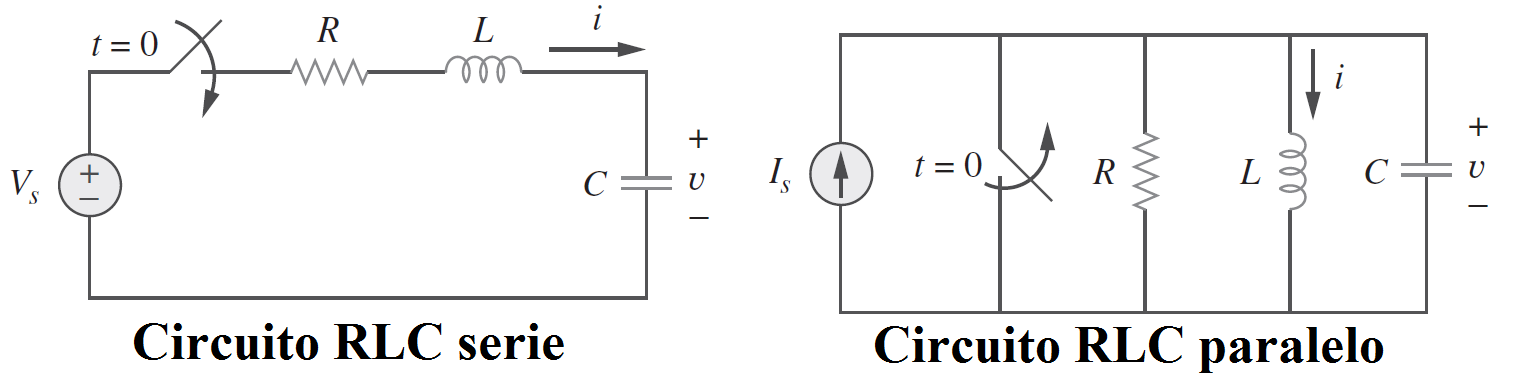

*Figura 1: Circuitos RLC en serie y paralelo*

Para el análisis de estos circuitos se debe considerar si tienen fuente de energía o no. En caso de tenerla se debe realizar inicialmente un análisis del circuito estable al tener conectada una fuente, y luego proceder a uno transitorio al quitar la fuente de alimentación del circuito. En caso que el circuito no posea fuentes sólo será necesario el análisis transitorio y deberá existir alguna carga inicial en alguno de los componentes de almacenamiento. En este caso sólo se hará el análisis de circuitos sin fuente, ya que el añadir una sólo producirá una gráfica adicional para $t<0$ y hallar ciertas condiciones iniciales que requieren de un análisis básico del circuito estable.

#### RLC en serie.

Estos circuitos se ven modelados por la siguiente ecuación diferencial de segundo orden, junto a sus condiciones iniciales: [2]

$$\frac{d^2 i}{dt} + \frac{R}{L} \frac{di}{dt} + \frac{i}{LC} = 0 \ ; \ v(0) = \frac{1}{C} \int_{- \infty}^0 i(t) dt = v_0 \ ; \ i(0) = I_0$$

La solución de esta ecuación depende de las constantes definidas en el proceso de resolución (que se expresa mejor en la referencia [2]) $\alpha = \frac{R}{2L}$ y $\omega_0 = \frac{1}{\sqrt{LC}}$. Según la relación de estas el sistema tomará su comportamiento. Si $\alpha > \omega_0$ se estará en el caso de una respuesta sobreamortiguada, si $\alpha = \omega_0$ se está en la región críticamente amortiguada y si $\alpha < \omega_0$ se tiene el caso subamortiguado. Cada caso ya posee una solución analítica, pero en la presente se buscará resolver la ecuación diferencial inicial.

#### RLC en paralelo.

Al igual que con los circuitos previamente observados, estos están regidos por una ecuación diferencial de segundo orden y sus dos condiciones iniciales. [2] Como se muestra a continuación:

$$\frac{d^2 v}{dt} + \frac{1}{RC} \frac{dv}{dt} + \frac{v}{LC} = 0 \ ; \ i(0) = I_0 = \frac{1}{L} \int_{- \infty}^0 v(t) dt \ ; \ v(0) = V_0$$

Para este caso, de nuevo, la solución depende de las constantes redefinidas $\alpha = \frac{1}{2RC}$ y $\omega_0 = \frac{1}{\sqrt{LC}}$. De la relación entre estas salen los mismos casos anteriores.

Estas respuestas se pueden evidenciar mejor en una gráfica, por lo que a continuación se podrá observar cada uno de los casos.

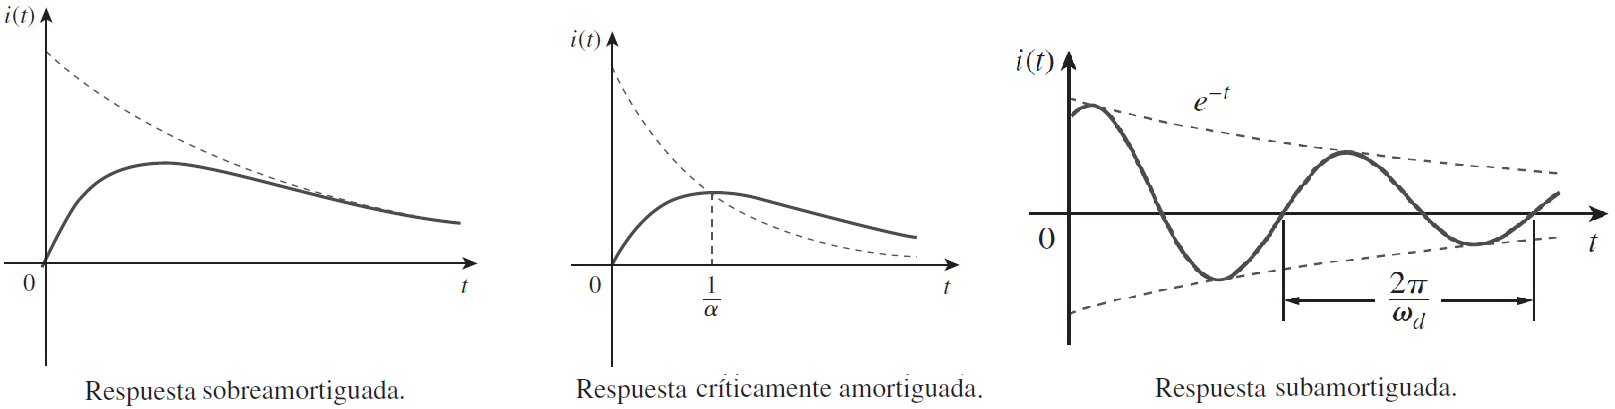

*Figura 2: Respuestas gráficas de los circuitos*

Para ambos tipos de circuitos RLC, en caso de ser requerido hallar el resto de variables de interés se puede recurrir a cualquiera de los métodos básicos del análisis de circuitos eléctricos [3]; entre ellos la ley de Ohm, las leyes de Kirchhoff, los teoremas de Thevenin y Norton, etc...

El propósito del presente será construir un código que genere la solución numérica de un circuito RLC dado, en serie (corriente del circuito) o paralelo (voltaje de los componentes), y que grafique una sección de la variable hallada respecto al tiempo ($t>0$); esto teniendo como base las condiciones iniciales del circuito. Al hacer esto se usarán los temas de diferenciación, integración, resolución de ecuaciones diferenciales y otros temas abordados en el curso.



# Código

In [7]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
%matplotlib inline

In [8]:
"""
  Métodos Runge-Kutta
"""

# Definición de la función del método RK4
def RK4(f,y,t,dt): 
    k1 = dt*f(y,t)
    k2 = dt*f(y+0.5*k1,t+0.5*dt)
    k3 = dt*f(y+0.5*k2,t+0.5*dt)
    k4 = dt*f(y+k3,t+dt)   
    return y+1/6*(k1+2*k2+2*k3+k4)

Dfc = lambda f, x, h: (f(x+h) - f(x-h))/(2*h)  # derivada

# Hallar los puntos
def Newton_Raphson(f,Df,p0,eps=1e-8,Nmax=100):
    i=1
    while i<Nmax:
        # while True: # se detiene con los break de abajo
        p = p0 -f(p0)/Df(p0) 
        #print (i, p, f(p))  
        if ( np.abs(p - p0) < eps ): break  # condición para detenerse
        #if ( np.abs((p - p0)/p) < eps ): break
        #if ( np.abs(f(p)) < eps ): break
        i=i+1   
        p0 = p
        #if (i == Nmax): print ("el método falló")
    return p

# Definición de la función del método RK2
def RK2(f,y,t,dt):
    k1 = dt*f(y,t)
    k2 = dt*f(y+0.5*k1,t+0.5*dt)
    return y+k2

In [38]:
"""
  Código para determinar la corriente de un circuito RLC en serie, o voltaje de un circuito RLC en paralelo
"""

# Definición de la función
def RLC(cxto,R,C,L,i0,v0): # Función para determinar corriente de un circuito RLC serie o voltaje de RLC paralelo.
    """Los parámetros son: cxto='serie' o 'paralelo'; R=resistencia en Ohms; C=capacitancia en F; L=inductancia en H; 
      i0=corriente del circuito en t=0s; v0=voltaje del circuito en t=0s
    """
    dt = 0.1
    t0 = 0
    tf = 100
    t = np.arange(t0, tf + dt, dt)

    # Condiciones para un circuito RLC en serie
    if cxto == 'serie':
        alpha = R/L
        omega = 1/((L*C)**(1/2))
        
        def g0(i,h,t):
            return h
        def g1(i,h,t):
            return ((-alpha*h) - ((omega**2)*i))
        
        i = i1 = i2 = np.zeros(len(t))
        h = h1 = h2 = np.zeros(len(t))
        
        i[0] = i0
        h[0] = v0
        
        y = [i[0],h[0]]
        
        def function(y,t):
            # Convencion y = [x0, v0]
            x = y[0]
            v = y[1]
            # Derivadas
            dx = g0(x,v,t)
            dv = g1(x,v,t)
            f = [dx, dv] 
            return np.array(f)

        for j in range(len(t) - 1):
            y = RK4(function,y,t[j],dt)
            i[j+1] = y[0]
            h[j+1] = y[1]

        # Gráfica de la corriente
        plt.figure()
        plt.plot(t,i,color='crimson',label=r'$i(t) RK4$')
        plt.title(r'Corriente RLC serie. R=%.2f; C=%.2f; L=%.2f; $i_0$=%.2f; $v_0$=%.2f' %(R,C,L,i0,v0))
        plt.xlabel(r'$t(s)$')
        plt.ylabel('i(A)')
        #plt.yscale('log') # útil para diagramas de Bode.
        plt.grid()
        
        # Comparación de los métodos
        for k in range(0, len(t)-1):
            i1[k+1]=g0(i1[k],h1[k],t[k])*dt+i1[k]
            h1[k+1]=g1(i1[k],h1[k],t[k])*dt+h1[k]
            
        for j in range(len(t) - 1):
            y = RK2(function,y,t[j],dt)
            i2[j+1] = y[0]
            h2[j+1] = y[1]

        # Gráfica con el método de Euler y RK2
        plt.plot(t,i1,color='green',label=r'$i(t) Euler$')
        plt.plot(t,i2,color='indigo',label=r'$i(t) RK2$')       
        plt.legend()
        
        # Definición de la constante
        alpha1 = R/(2*L)
        if (alpha1>omega):
            print('La respuesta del circuito es sobreamortiguada.')
        elif (alpha1==omega):
            print('La respuesta del circuito es críticamente amortiguada.')
        elif (alpha1<omega):
            print('La respuesta del circuito es subamortiguada.')

        # Energías   
        e = -1.6E-19 # electrón 
        E = i*R*e  # según los métodos
        E1 = i1*R*e
        E2 = i2*R*e
        
        # Hallar la carga considerando la derivada de la corriente
        Sj = CubicSpline(t, i, bc_type='natural')
        Sj1a = Sj(t,1)
        Sj1 = CubicSpline(t,Sj1a,bc_type='natural')
        
        # Gráfica de la carga
        plt.figure()
        plt.plot(t,Sj(t, 1),color='darkorange',label=r'$q(t)$')
        plt.title(r'Carga de elementos circuito en serie')
        plt.xlabel(r'$t(s)$')
        plt.ylabel(r'$q(C)$')
        plt.grid()
        plt.legend()

        # Gráfica de la energía según los métodos
        plt.figure()
        plt.plot(t,E,color='black',label=r'$E(t)$')
        plt.plot(t,E1,color='red',label=r'$E1(t)$')
        plt.plot(t,E2,color='royalblue',label=r'$E2(t)$')
        plt.title(r'Energía de un $e^-$ en movimiento por circuito')
        plt.xlabel(r'$t(s)$')
        plt.ylabel(r'$E(J)$')
        plt.grid()
        plt.legend()
        print('La(s) frecuencia(s) de corte para este circuito será(n): ', Newton_Raphson(Sj,Sj1,1))
        
    # Condiciones para un circuito RLC en paralelo   
    elif cxto == 'paralelo':
        alpha = 1/(R*C)
        omega = 1/((L*C)**(1/2))
        
        def g0(v,h,t):
            return h
        def g1(v,h,t):
            return ((-alpha*h) - ((omega**2)*v))
        
        v = np.zeros(len(t))
        h = np.zeros(len(t))
        
        v[0] = v0
        h[0] = i0
        
        y = np.array([v[0],h[0]])
        
        def function(y,t):
            # Convencion y = [x0, v0]
            x = y[0]
            v = y[1]
            # Derivadas
            dx = g0(x,v,t)
            dv = g1(x,v,t)
            f = [dx, dv] 
            return np.array(f)

        for i in range(len(t) - 1):
            y = RK4(function,y,t[i],dt)
            v[i+1] = y[0]
            h[i+1] = y[1]

        # Gráfica del voltaje
        plt.figure()
        plt.plot(t,v,color='blueviolet',label=r'$v(t)$')
        plt.title(r'Voltaje RLC paralelo. R=%.2f; C=%.2f; L=%.2f; $i_0$=%.2f; $v_0$=%.2f' %(R,C,L,i0,v0))
        plt.xlabel(r'$t(s)$')
        plt.ylabel('v(V)')
        #plt.yscale('log') # útil para diagramas de Bode.
        plt.grid()
        plt.legend()

        # Definición de la constante
        alpha1 = 1/(2*R*C)
        if (alpha1>omega):
            print('La respuesta del circuito es sobreamortiguada.')
        elif (alpha1==omega):
            print('La respuesta del circuito es críticamente amortiguada.')
        elif (alpha1<omega):
            print('La respuesta del circuito es subamortiguada.')
        
        # Energías 
        e = -1.6E-19
        E = v*e

        # Gráfica de la energía
        plt.figure()
        plt.plot(t,E,color='mediumaquamarine',label=r'$E(t)$')
        plt.title(r'Energía de un $e^-$ en movimiento por circuito')
        plt.xlabel(r'$t(s)$')
        plt.ylabel(r'$E(J)$')
        plt.grid()
        plt.legend()
        
    else:
        print('El programa sólo trabaja con circuitos RLC de segundo orden en serie o paralelo.')

La respuesta del circuito es sobreamortiguada.
La(s) frecuencia(s) de corte para este circuito será(n):  136.1808278717535


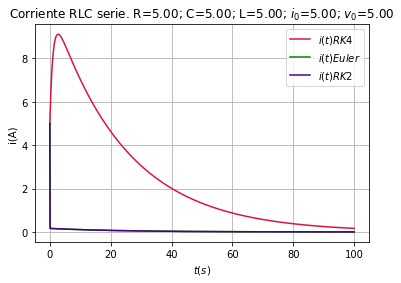

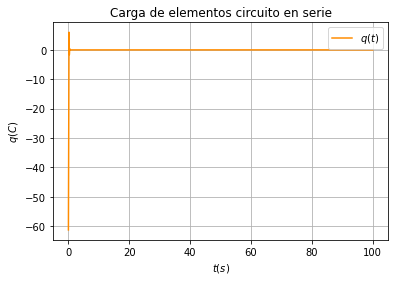

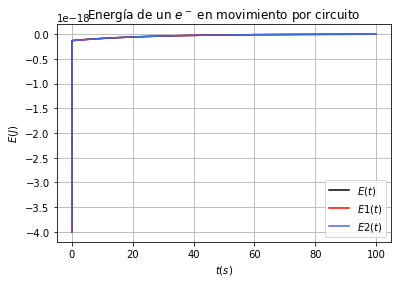

In [33]:
# Funcionamiento de la función RLC en serie
RLC('serie',5,5,5,5,5)

La respuesta del circuito es subamortiguada.


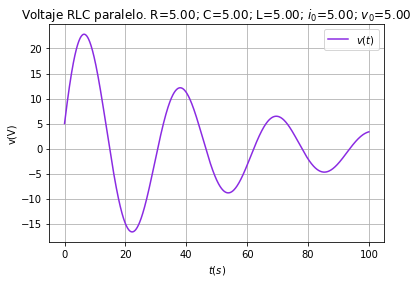

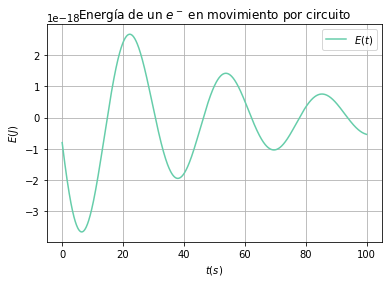

In [39]:
# Funcionamiento de la función RLC en paralelo
RLC('paralelo',5,5,5,5,5)

La respuesta del circuito es sobreamortiguada.


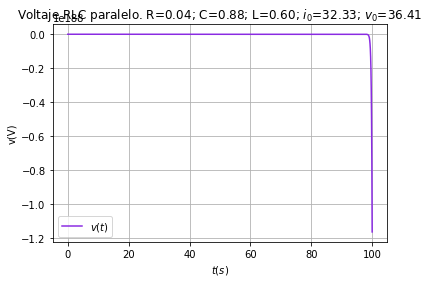

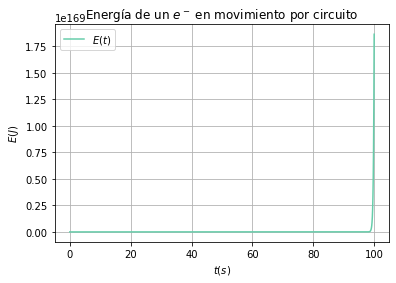

In [43]:
# Verificación estadística para un circuito en paralelo
R = np.random.uniform()
L = np.random.uniform()
C = np.random.uniform()
i0 = np.random.uniform(0,50)
v0 = np.random.uniform(0,50)

RLC('paralelo',R,L,C,i0,v0)

# Resultados

El primer experimento que se realiza, consta en visualizar la corriente de un circuito RLC en serie y el voltaje de uno en paralelo, usando los parámetros $R = L = C = i0 = v0 = 1$; se obtuvo lo siguiente:

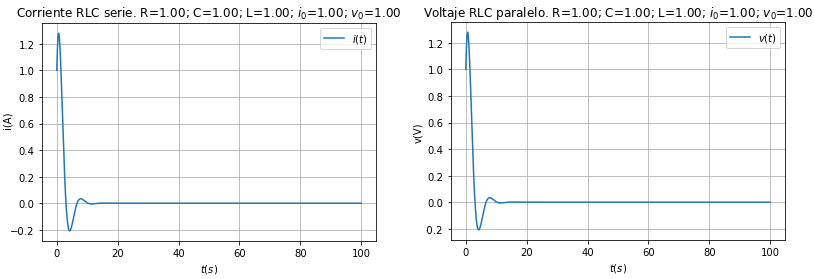

*Figura 3: Experimento 1*

Se puede observar que la corriente y el voltaje de un circuito RLC en serie y en paralelo respectivamente, son las mismas; esto se explica en que las constantes de las que depende el circuito se volverían iguales, y por tanto se estaría resolviendo la misma ecuación diferencial. Sin embargo, al cambiar los parámetros siendo todos equivalentes a 5, se obtiene: 

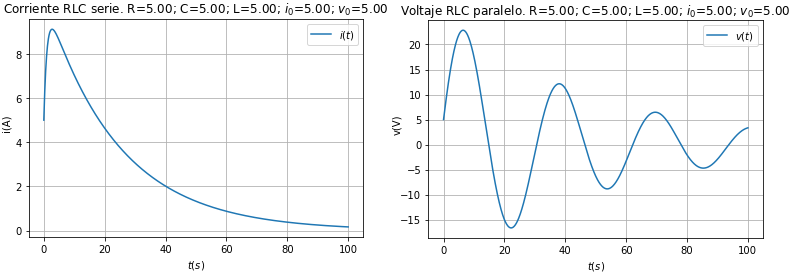 

*Figura 4: Experimento 2*

De los anteriores se obtuvieron las siguientes gráficas de energía del circuito, estas fueron calculadas haciendo uso de la definición del voltaje para un electrón ($V = \frac{W}{e^-} \Longrightarrow W = Ve^-$) y de la ley de Ohm de ser requerido ($V = RI$), sin embargo, también se puede verificar haciendo uso de la ley de voltajes de Kirchhoff. Para el experimento 1, dado que el voltaje y la corriente son iguales, basta con poner una sola gráfica de energía.

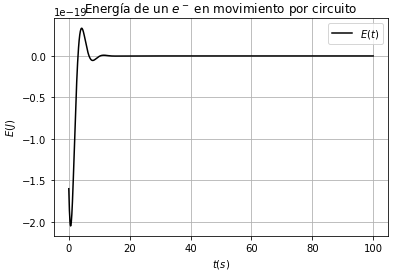


*Figura 5: Energía experimento 1*


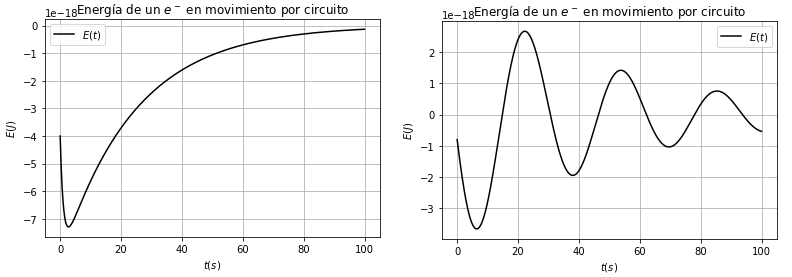

*Figura 6: Energía experimento 2*

De las dos gráficas anteriores se evidencia que la energía siempre cae hacia cero, lo que demuestra que se cumple el principio de conservación de la energía. Esto era de esperarse ya que al usar el método de Runge-Kutta de cuarto orden esto se garantiza.

Los circuitos RLC de segundo orden, pueden servir como filtros pasivos que permiten atenuar, o no, señales a necesidad, esto con el fin de estabilizar ondas. Para el análisis de estos filtros pasivos basta con aprovechar la opción de una escala logarítmica en el código de las gráficas, lo que resulta en diagramas de Bode para el circuito que muestran la ganancia del circuito al variar la potencia [1]. Al realizar esto sobre el experimento 2 se obtiene:

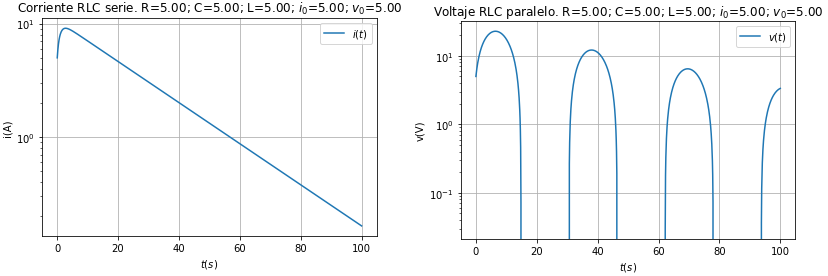

*Figura 7: Diagramas de Bode experimento 2*

En esta figura se puede observar como para el RLC serie la ganancia del circuito disminuye conforme aumenta la frecuencia del circuito; mientras que el comportamiento del RLC paralelo muestra una inestabilidad en la ganancia del circuito, por lo que puede que no sea un filtro útil.

En la última celda perteneciente a la sección "Código", usando números aleatorios, se permite simular diversos circuitos junto con su comportamiento en el cual se evidencian los casos de las respuestas mencionados anteriormente.


# Conclusión

La resolución de circuitos de segundo orden se resume al problema de un oscilador armónico que puede ser solucionado numéricamente al usar el método de Runge-Kutta de cuarto orden de forma computacional. Como se observó, este método proporciona una adecuada conservación de la energía en los sistemas físicos, lo cual es fundamental a la hora de realizar los análisis de los problemas. Y por otro lado, con los diagramas de Bode es posible evidenciar la ganancia que corresponde a un circuito desde su voltaje de entrada hasta el de salida. De esta forma se puede hallar la mejor combinación posible de parámetros que permita alcanzar las menores perdidas de voltaje en un circuito o lo que se necesite de acuerdo a la aplicación que se espere.


# Referencias

[1] Nilsson, J. W., Riedel, S. A., Cázares, G. N., & Fernández, A. S. (1995). Circuitos eléctricos. Addison-Wesley.

[2] Alexander, C. K., & Sadiku, M. N. (2013). Fundamentos de circuitos elétricos. AMGH Editora.

[3] Irwin, J. D., & Alvarado, E. V. (1997). Análisis básico de circuitos en Ingeniería. Prentice-Hall Hispanoamericana.